<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/ul/14_local_outlier_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

sns.set(font_scale=1.2)
np.random.seed(10)

In [2]:
data = make_moons(n_samples=400, noise=1.0)[0]
data[:5]

array([[ 2.34945456, -0.59574862],
       [-0.31494408,  0.35695758],
       [ 1.04567121,  0.82896976],
       [ 0.98789364,  0.63986326],
       [ 0.88425473,  1.71722162]])

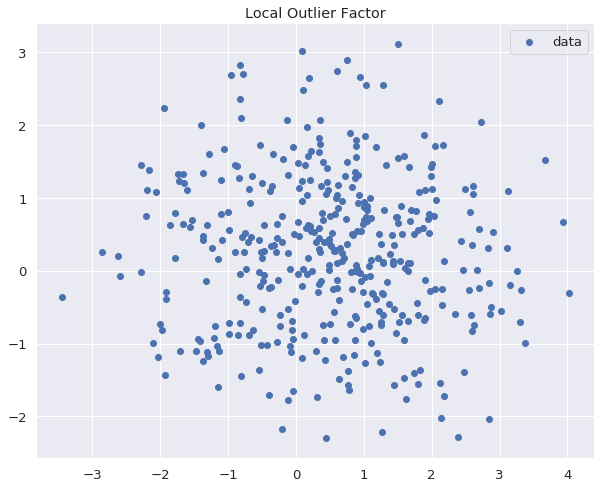

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], label='data', cmap='tab10')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [0]:
from sklearn.neighbors import LocalOutlierFactor 

lof = LocalOutlierFactor()

In [5]:
y_pred = lof.fit_predict(data)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
all_data = np.c_[data, y_pred]
all_data[:5]

array([[ 2.34945456, -0.59574862,  1.        ],
       [-0.31494408,  0.35695758,  1.        ],
       [ 1.04567121,  0.82896976,  1.        ],
       [ 0.98789364,  0.63986326,  1.        ],
       [ 0.88425473,  1.71722162,  1.        ]])

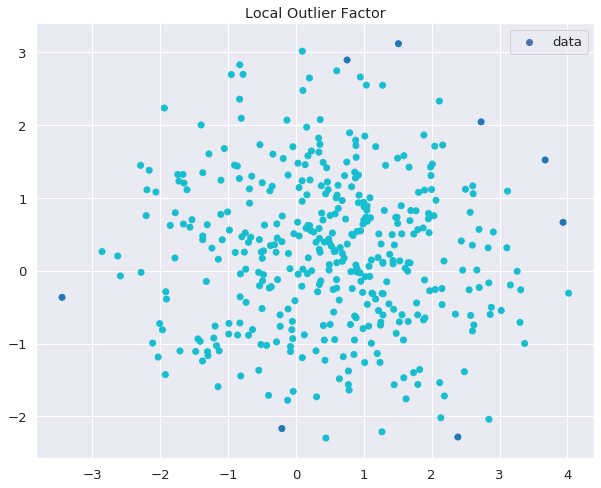

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [8]:
LOF_scores = lof.negative_outlier_factor_
LOF_scores[:5]

array([-1.01994737, -0.97889775, -1.00122623, -1.00221778, -1.08932209])

In [9]:
radius = (LOF_scores.max() - LOF_scores) / (LOF_scores.max() - LOF_scores.min())
radius[:5]

array([0.06608745, 0.01924112, 0.04472265, 0.04585422, 0.14525875])

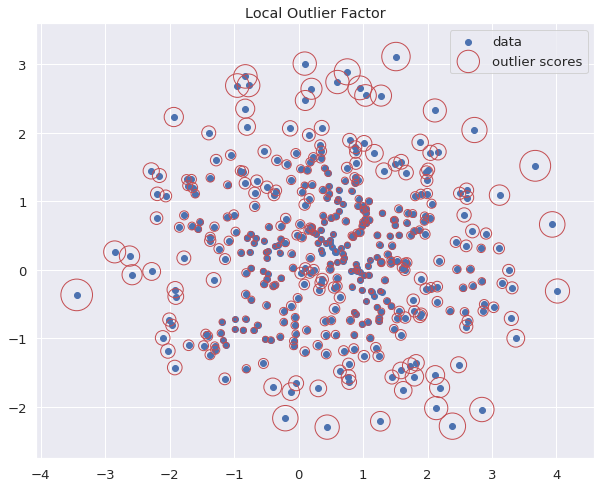

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(all_data[:, 0], all_data[:, 1], label='data', cmap='tab10')
plt.scatter(all_data[:, 0], all_data[:, 1], s=1000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

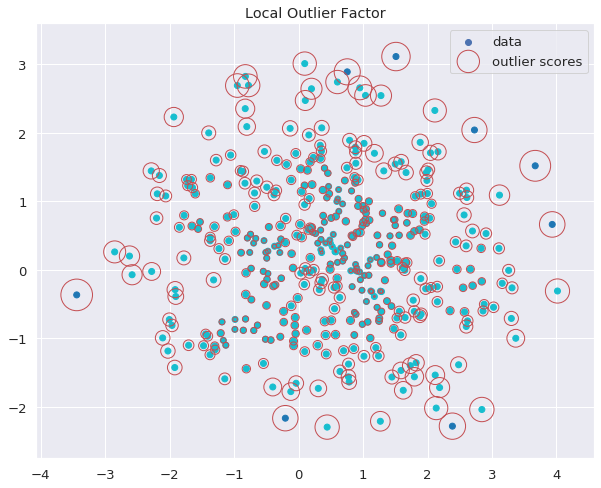

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.scatter(all_data[:, 0], all_data[:, 1], s=1000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [12]:
lof = LocalOutlierFactor(novelty=True)
lof.fit(data)
y_pred = lof.predict(data)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

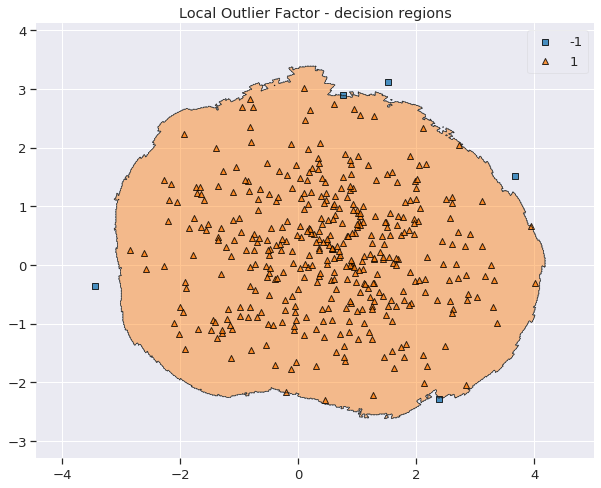

In [13]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(data, y_pred, lof)
plt.title('Local Outlier Factor - decision regions')
plt.show()